# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [181]:
library(dplyr)
library(factoextra)

df_pilot_2025 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_pilot_2025.rds")

In [182]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot_2025_clust <- df_pilot_2025 %>% select(all_of(variables_clust)) %>% select(-id)

ERROR: [1m[33mError[39m in `select()`:[22m
[1m[22m[36mi[39m In argument: `all_of(variables_clust)`.
[1mCaused by error in `all_of()`:[22m
[33m![39m Can't subset elements that don't exist.
[31mx[39m Elements `postal_code`, `ses_dwellingTownhouse`, `lifestyle_typeTransportSUV`, and `lifestyle_typeTransportPublicTransit` don't exist.


In [174]:
# Scaling des variables
df_scaled <- scale(df_pilot_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

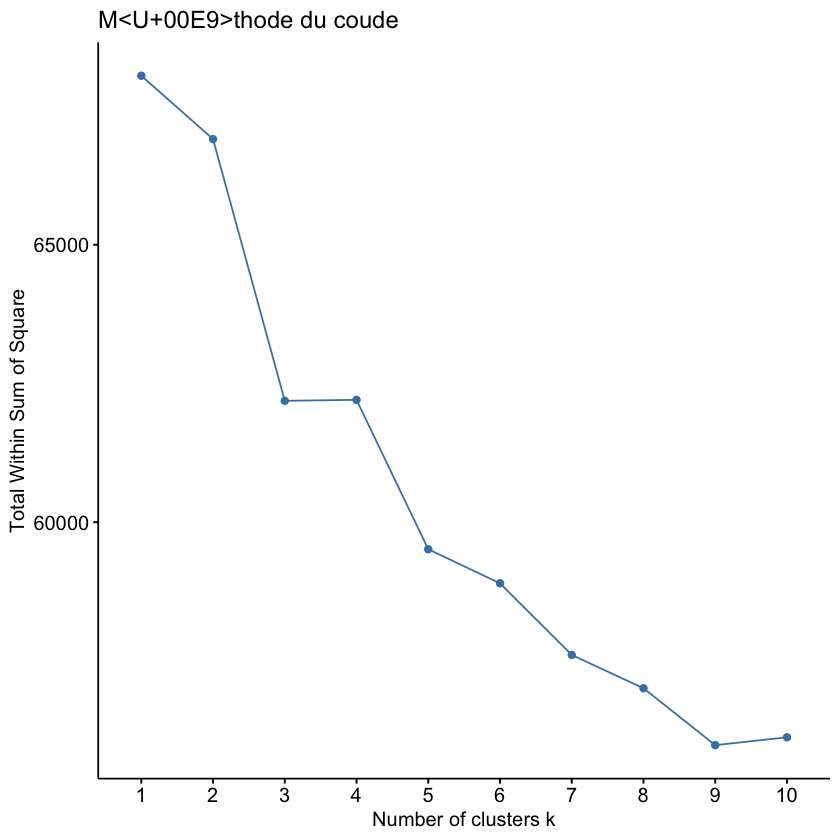

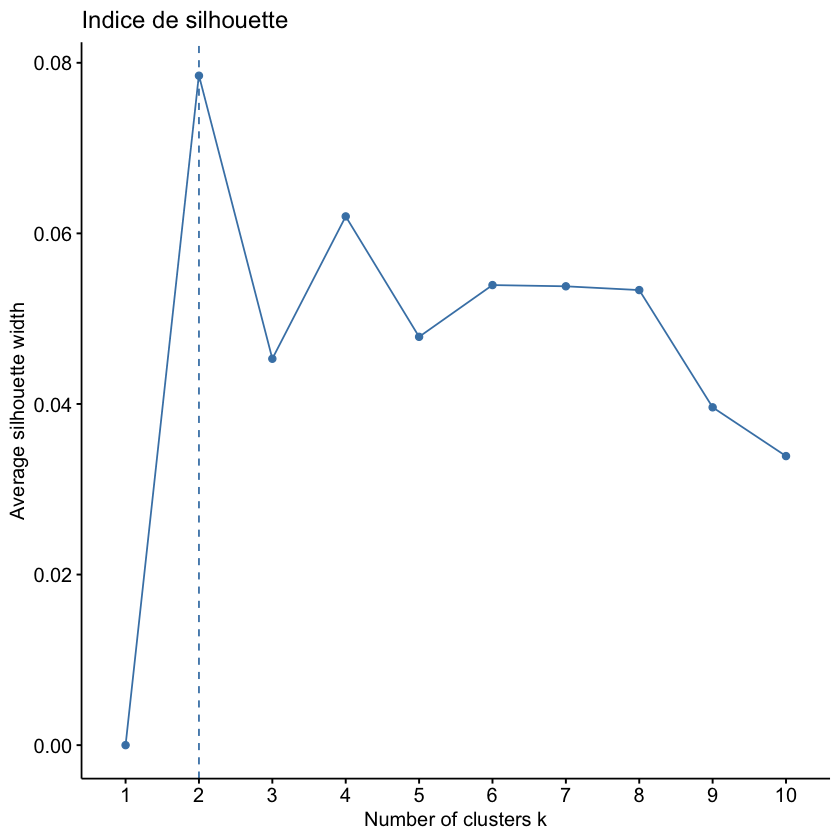

In [175]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [176]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 9

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [177]:
kmeans_result

K-means clustering with 9 clusters of sizes 155, 185, 129, 98, 108, 111, 4, 22, 220

Cluster means:
  lifestyle_exerciseGym lifestyle_exerciseTeamSport lifestyle_exerciseWalk
1            0.03749006                  0.03162374            -0.05870412
2           -0.21504174                 -0.08322990             0.20797404
3            0.19751024                  0.12097763             0.04068170
4            0.83925943                  0.54461215            -0.72756583
5           -0.14899896                 -0.20626453             0.33815314
6            0.06040498                 -0.16855690             0.17555434
7           -0.44699687                 -0.24612689            -0.01356057
8           -0.44699687                 -0.24612689            -1.01316794
9           -0.23975287                 -0.05043895             0.01370145
  lifestyle_exerciseRun lifestyle_exerciseYoga lifestyle_exerciseSwim
1          -0.153393020            0.075704868             -0.1475163
2         

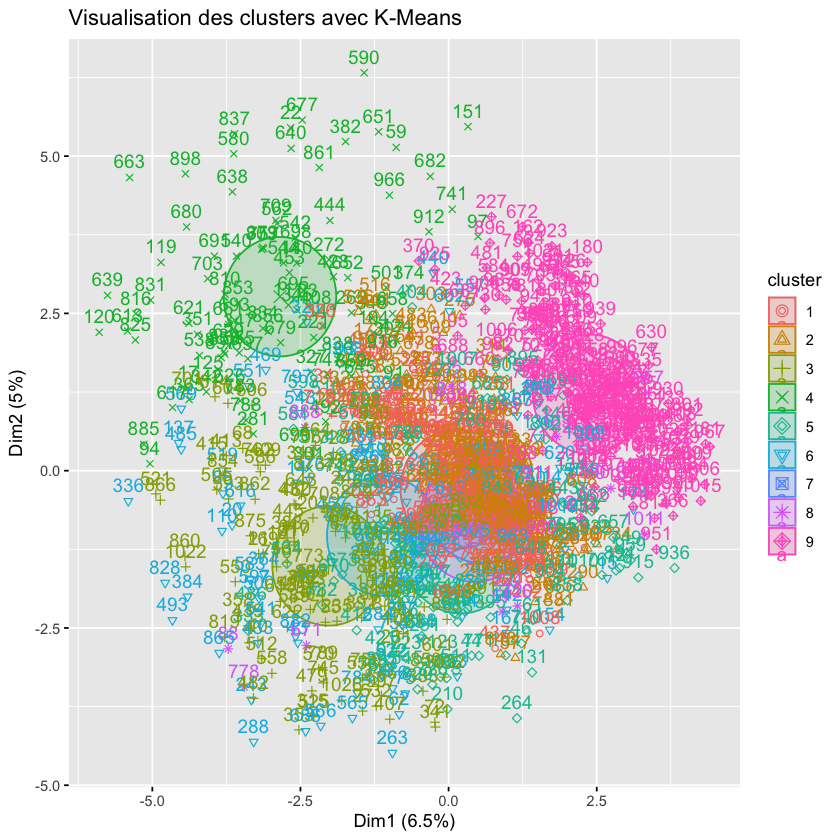

In [178]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [179]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot_2025$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot_2025 <- df_pilot_2025 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot_2025[[paste0("cluster_", i)]] <- ifelse(df_pilot_2025$cluster == i, 1, 0)
}

In [180]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_kmeans.rds")
saveRDS(df_pilot_2025, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_2025.rds")